# Classification of exotic fruits with KNN

# TropicTaste Inc. – Fruit Classification Project

**TropicTaste Inc.**, a leader in exotic fruit distribution, aims to improve efficiency and accuracy in the fruit classification process. The goal is to develop a **machine learning model** capable of predicting the type of fruit based on numerical features.

The current exotic fruit classification process is manual and error-prone, making it inefficient and resource-intensive. An automated and precise system is crucial to optimize business operations and maintain high-quality standards.

By implementing an automated classification model, TropicTaste Inc. will be able to:

- **Improve Operational Efficiency:** Automating classification will reduce the time and resources required, increasing productivity.  
- **Reduce Human Errors:** A machine learning model will minimize classification mistakes, ensuring greater accuracy.  
- **Optimize Inventory Management:** Accurate classification will enable better inventory control, ensuring optimal storage conditions for each fruit type.  
- **Increase Customer Satisfaction:** Correct identification and classification of fruits will help maintain high quality standards, improving customer satisfaction.  

---

## Project Details

1. **Dataset:** A dataset containing various numerical features of different exotic fruits.  
2. **Algorithm:** Implementation of the **K-Nearest Neighbors (KNN)** algorithm for classification.  
3. **Output:** The model must correctly predict the type of fruit based on the provided data.  

---

## Project Requirements

### 1. Dataset Preparation
- Load and preprocess the exotic fruit data.  
- Handle missing values, normalize, and scale the data.  

### 2. KNN Model Implementation
- Develop and train the KNN model.  
- Optimize parameters to improve predictive accuracy.  

### 3. Performance Evaluation
- Use cross-validation techniques to evaluate the model's generalization ability.  
- Calculate performance metrics such as accuracy and classification error.  

### 4. Results Visualization
- Create charts to visualize and compare model performance.  
- Analyze and interpret results to identify potential areas for improvement.  

---

## Dataset Variables

The dataset is downloadable here: [fruits.csv](https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv)  

It contains the following variables:

1. **Fruit:** Type of fruit. This is the target variable we aim to predict.  
2. **Weight (g):** Weight of the fruit in grams. Continuous variable.  
3. **Average Diameter (mm):** Average diameter of the fruit in millimeters. Continuous variable.  
4. **Average Length (mm):** Average length of the fruit in millimeters. Continuous variable.  
5. **Peel Hardness (1-10):** Hardness of the fruit peel on a scale from 1 to 10. Continuous variable.  
6. **Sweetness (1-10):** Sweetness of the fruit on a scale from 1 to 10. Continuous variable.  

---

**Notes:**  
- Perform a thorough **exploratory data analysis (EDA)** before modeling.  
- Apply appropriate preprocessing techniques.  
- Measure model performance using metrics that best reflect predictive quality.  
- Accompany each analysis step with appropriate **visualizations** and provide clear comments, extracting useful insights from the data.



### Table of Contents

* 1. [Import and introductory study of data](#1)
   * [1.1. Data import and control](#2)
   * [1.2. Explanation of features](#3)
   * [1.3. Cataloguing of features](#4)

* 2. [Exploratory Data Analysis (EDA)](#5)
   * [2.1.Analysis of target distribution (Frutto)](#6)
   * [2.2. Study of distribution and correlations between features](#7)

* 3. [Preprocessing](#8)
   * [3.1. Target encoding and Preprocessing pipeline with column transformer](#9)
   
* 4. [Machine Learning: creation of the predictive model](#10)
   * [4.1. Baseline Pipeline with KNN](#11)
   * [4.2. Hyperparameter tuning](#12)
   * [4.3. Confusion Matrix and ROC-AUC curve](#13)
   * [4.4. PCA decision regions](#14)
  
* 5. [Interpretability with SHAP](#15)

<a id="1"> </a>
### 1.Import and introductory study of data

<a id="2"> </a>
#### 1.1. Data import and control

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, make_scorer, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
import optuna
import shap

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="whitegrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)

print("\nTropicTaste Inc. – Fruit Classification Project")
print("="*70)
print("Libraries imported successfully!")

# =============================================================================
# Initial loading and exploration of the dataset
# =============================================================================

# URL dataset
dataset_url = "https://proai-datasets.s3.eu-west-3.amazonaws.com/fruits.csv"

print("\n Loading the Dataset")
print("-" * 40)

try:
    # Loading the dataset
    df = pd.read_csv(dataset_url)
    print(f"Dataset successfully uploaded!")
    print(f"Dataset size: {df.shape[0]} rows, {df.shape[1]} columns")

    # General information about the dataset
    print(f"\nGeneral information:")
    print(df.info())

    # First rows
    print(f"\nFirst 5 rows of the dataset:")
    print(df.head())

    # Descriptive statistics
    print(f"\nDescriptive statistics:")
    print(df.describe())

except Exception as e:
    print(f"Error loading dataset: {e}")

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



TropicTaste Inc. – Fruit Classification Project
Libraries imported successfully!

 Loading the Dataset
----------------------------------------
Dataset successfully uploaded!
Dataset size: 500 rows, 6 columns

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB
None

First 5 rows of the dataset:
  Frutto  Peso (g)  Diametro medio (mm)  Lunghezza media (mm)  \
0   Mela     86.40                89.68                  8.69   
1   Mela     77.58            

In [2]:
df

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88
...,...,...,...,...,...,...
495,Kiwi,40.82,67.52,7.39,7.28,5.56
496,Kiwi,54.65,62.95,7.06,6.47,4.68
497,Kiwi,35.70,71.43,7.64,9.75,4.36
498,Kiwi,30.80,65.23,5.91,7.65,4.13


I've already seen that there are no missing values but I'll do a further check

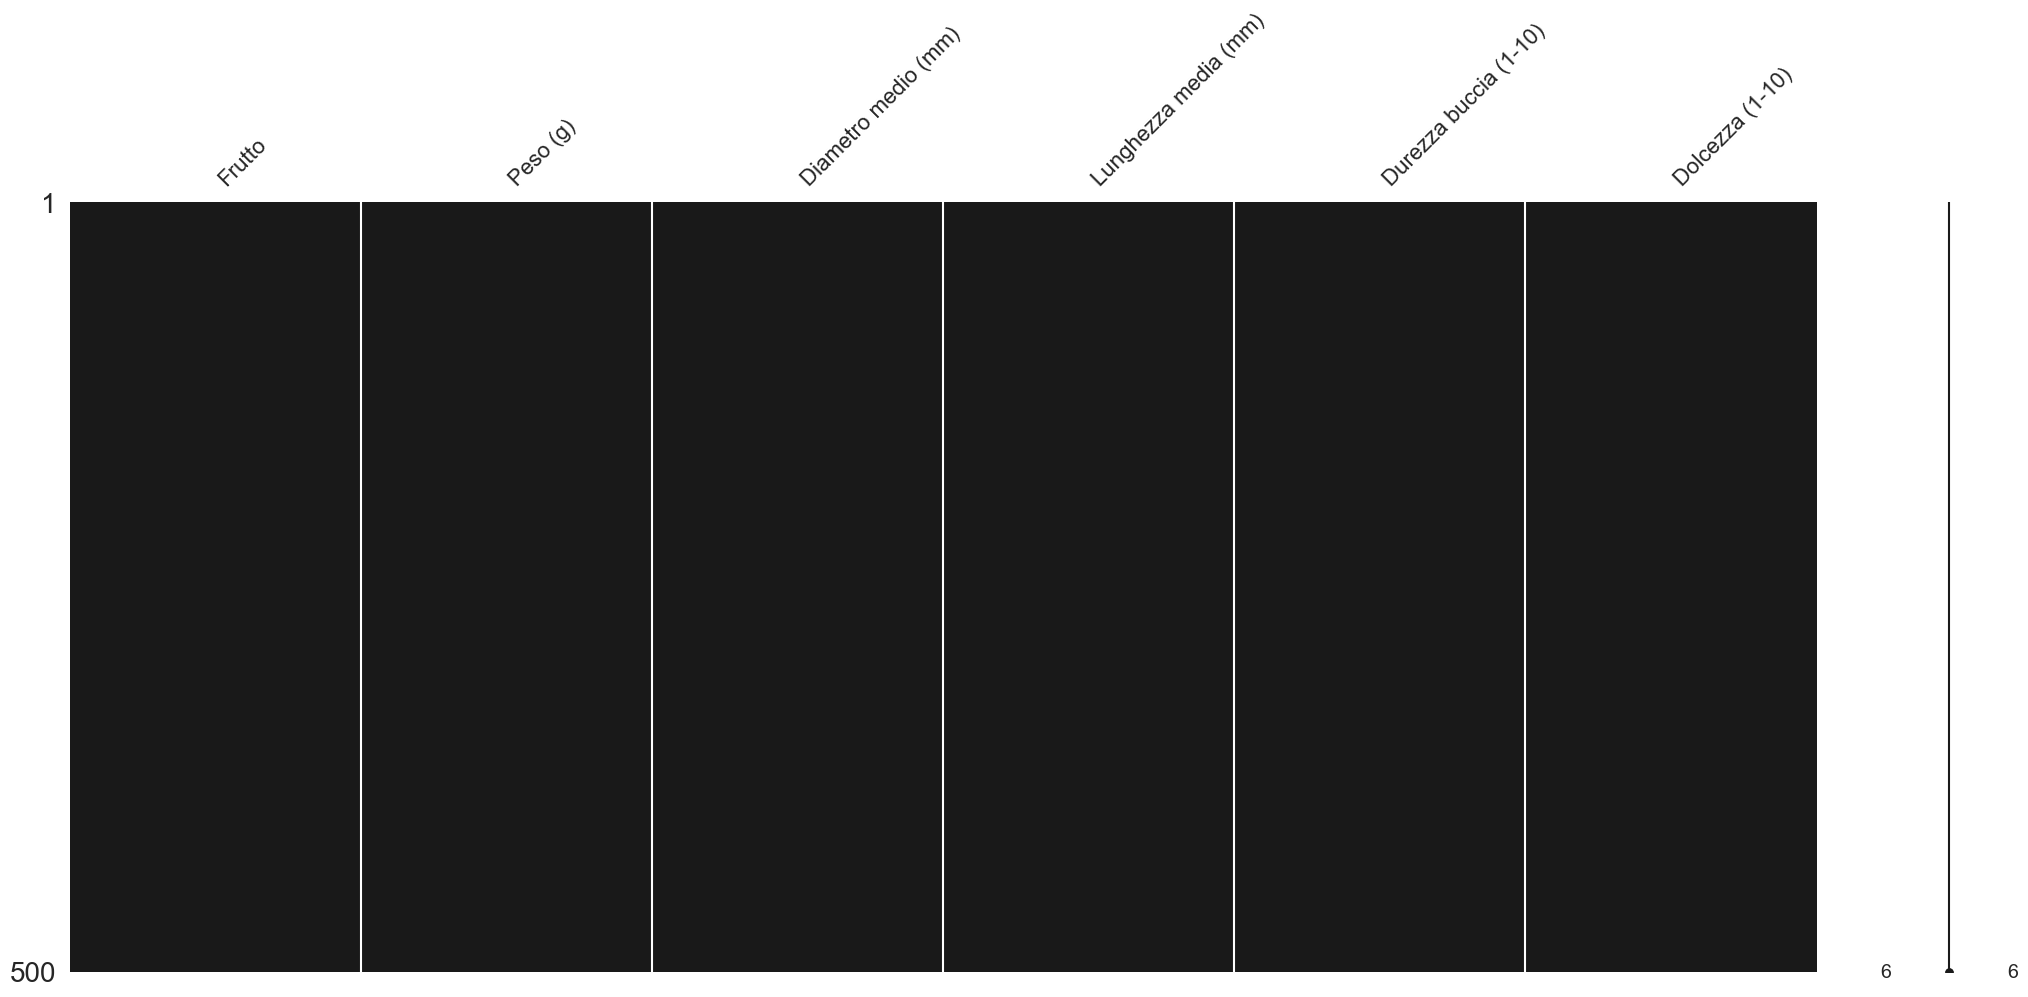

In [3]:
#df.isnull().sum().any()
msno.matrix(df, color="0.1")
plt.show()

<a id="3"> </a>
#### 1.2. Explanation of features

The dataset *df* contains the following variables:<br>

1. **Fruit:** Type of fruit. This is the target variable we aim to predict.  
2. **Weight (g):** Weight of the fruit in grams. Continuous variable.  
3. **Average Diameter (mm):** Average diameter of the fruit in millimeters. Continuous variable.  
4. **Average Length (mm):** Average length of the fruit in millimeters. Continuous variable.  
5. **Peel Hardness (1-10):** Hardness of the fruit peel on a scale from 1 to 10. Continuous variable.  
6. **Sweetness (1-10):** Sweetness of the fruit on a scale from 1 to 10. Continuous variable.  

We see that the variables are all numerical continuous while target variable is a categorical qualitative feature with 5 classes ( so this is a multiclass task)

<a id="4"> </a>
#### 1.3. Cataloguing of features

In [4]:
#create lists for each type of feature to study their correlations and later, 
# #when it is time to train a learning model, encode them in numerical values. 
# #numerical features: 
num = [] 
for i in df.columns: 
    if type(df[i][0]) in [int, float, np.int64, np.float64]: 
        num.append(i) 
#target feature: 
target = [] 
for i in df.columns: 
    if i not in num : target.append(i) 
    
print("Numerical features:\n{} \nTot: {}".format(num,len(num))) 
print("Target feature:\n{}\nTot: {}".format(target,len(target)))

Numerical features:
['Peso (g)', 'Diametro medio (mm)', 'Lunghezza media (mm)', 'Durezza buccia (1-10)', 'Dolcezza (1-10)'] 
Tot: 5
Target feature:
['Frutto']
Tot: 1


<a id="5"> </a>
### 2. Exploratory Data Analysis (EDA)

In [5]:
# =============================================================================
# Exploratory data analysis (EDA)
# =============================================================================

print("\nExploratory Data Analysis")
print("-" * 40)

# Checking for missing values
print("Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

# Duplicate check
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicated rows: {duplicates}")


# Descriptiv statistics
display(df.describe())

# Classes distribution
print(df['Frutto'].value_counts())



Exploratory Data Analysis
----------------------------------------
Checking for missing values:
Series([], dtype: int64)
No missing values found!

Number of duplicated rows: 0


,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


Frutto
Mela       100
Banana     100
Arancia    100
Uva        100
Kiwi       100
Name: count, dtype: int64


#### Missing Values Check
No missing values were found in the dataset, which indicates that all rows are complete and there is no need for imputation. This is a good starting point for modeling.

---

#### Duplicate Rows Check
There are no duplicate rows in the dataset. Each observation is unique, ensuring that the model will not be biased by repeated data.

---

#### Summary Statistics of Numerical Features
| Feature | Count | Mean | Std | Min | 25% | 50% | 75% | Max |
|---------|-------|------|-----|-----|-----|-----|-----|-----|
| Peso (g) | 500 | 47.31 | 26.77 | 8.57 | 24.80 | 42.38 | 68.08 | 111.21 |
| Diametro medio (mm) | 500 | 86.57 | 64.29 | 7.53 | 50.51 | 70.45 | 88.85 | 299.89 |
| Lunghezza media (mm) | 500 | 5.30 | 2.64 | 1.15 | 2.67 | 5.67 | 7.46 | 11.14 |
| Durezza buccia (1-10) | 500 | 7.44 | 1.81 | 3.07 | 6.15 | 7.34 | 8.62 | 13.72 |
| Dolcezza (1-10) | 500 | 3.59 | 1.26 | 1.25 | 2.57 | 3.54 | 4.47 | 6.95 |

**Observations:**
- The dataset contains **500 samples** for each numeric feature.  
- The features show a wide range, especially `Diametro medio`, indicating high variability among fruits.  
- Some features, such as `Durezza buccia` and `Dolcezza`, have relatively smaller ranges, suggesting less variation in these characteristics.  
- Outliers may exist, particularly in `Diametro medio` and `Durezza buccia`, as the maximum values are significantly higher than the 75th percentile.

---

#### Fruit Type Distribution
The dataset contains the following counts for each fruit type:

| Fruit   | Count |
|---------|-------|
| Mela    | 100   |
| Banana  | 100   |
| Arancia | 100   |
| Uva     | 100   |
| Kiwi    | 100   |

- The dataset is **perfectly balanced**, with **100 samples for each fruit type**.  
- Balanced classes are advantageous for machine learning models, as it prevents bias toward a particular fruit.

---


1. No missing values or duplicates, ensuring clean data.  
2. Features have varying scales; normalization may be needed for modeling (especially for KNN).  
3. The dataset is balanced across fruit types, supporting fair classification.  
4. Outliers and feature variability should be considered during preprocessing.

<a id="6"> </a>
#### 2.1.Analysis of target distribution (Frutto)

Let's try to better understand the target distribution

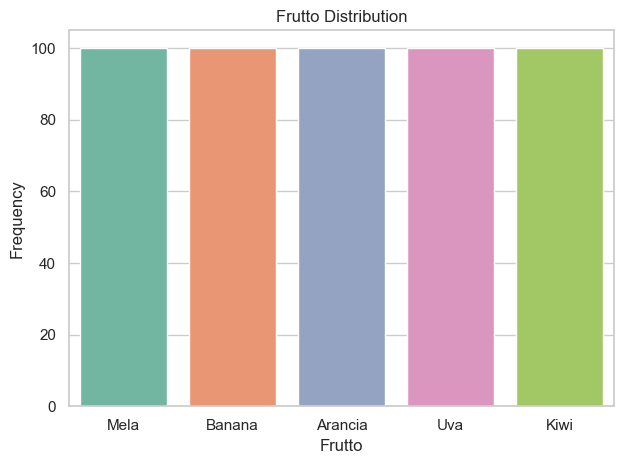


Target statistics (Frutto):

Mode: 0    Arancia
1     Banana
2       Kiwi
3       Mela
4        Uva
Name: Frutto, dtype: object


In [6]:
# Target distribution analysis (Frutto)

sns.countplot(x='Frutto', data=df, palette='Set2')
plt.title('Frutto Distribution')
plt.xlabel('Frutto')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Target statistics
print(f"\nTarget statistics (Frutto):")
print(f"\nMode: {df['Frutto'].mode()}")


<a id="7"> </a>
#### 2.2. Study of distribution and correlations between features

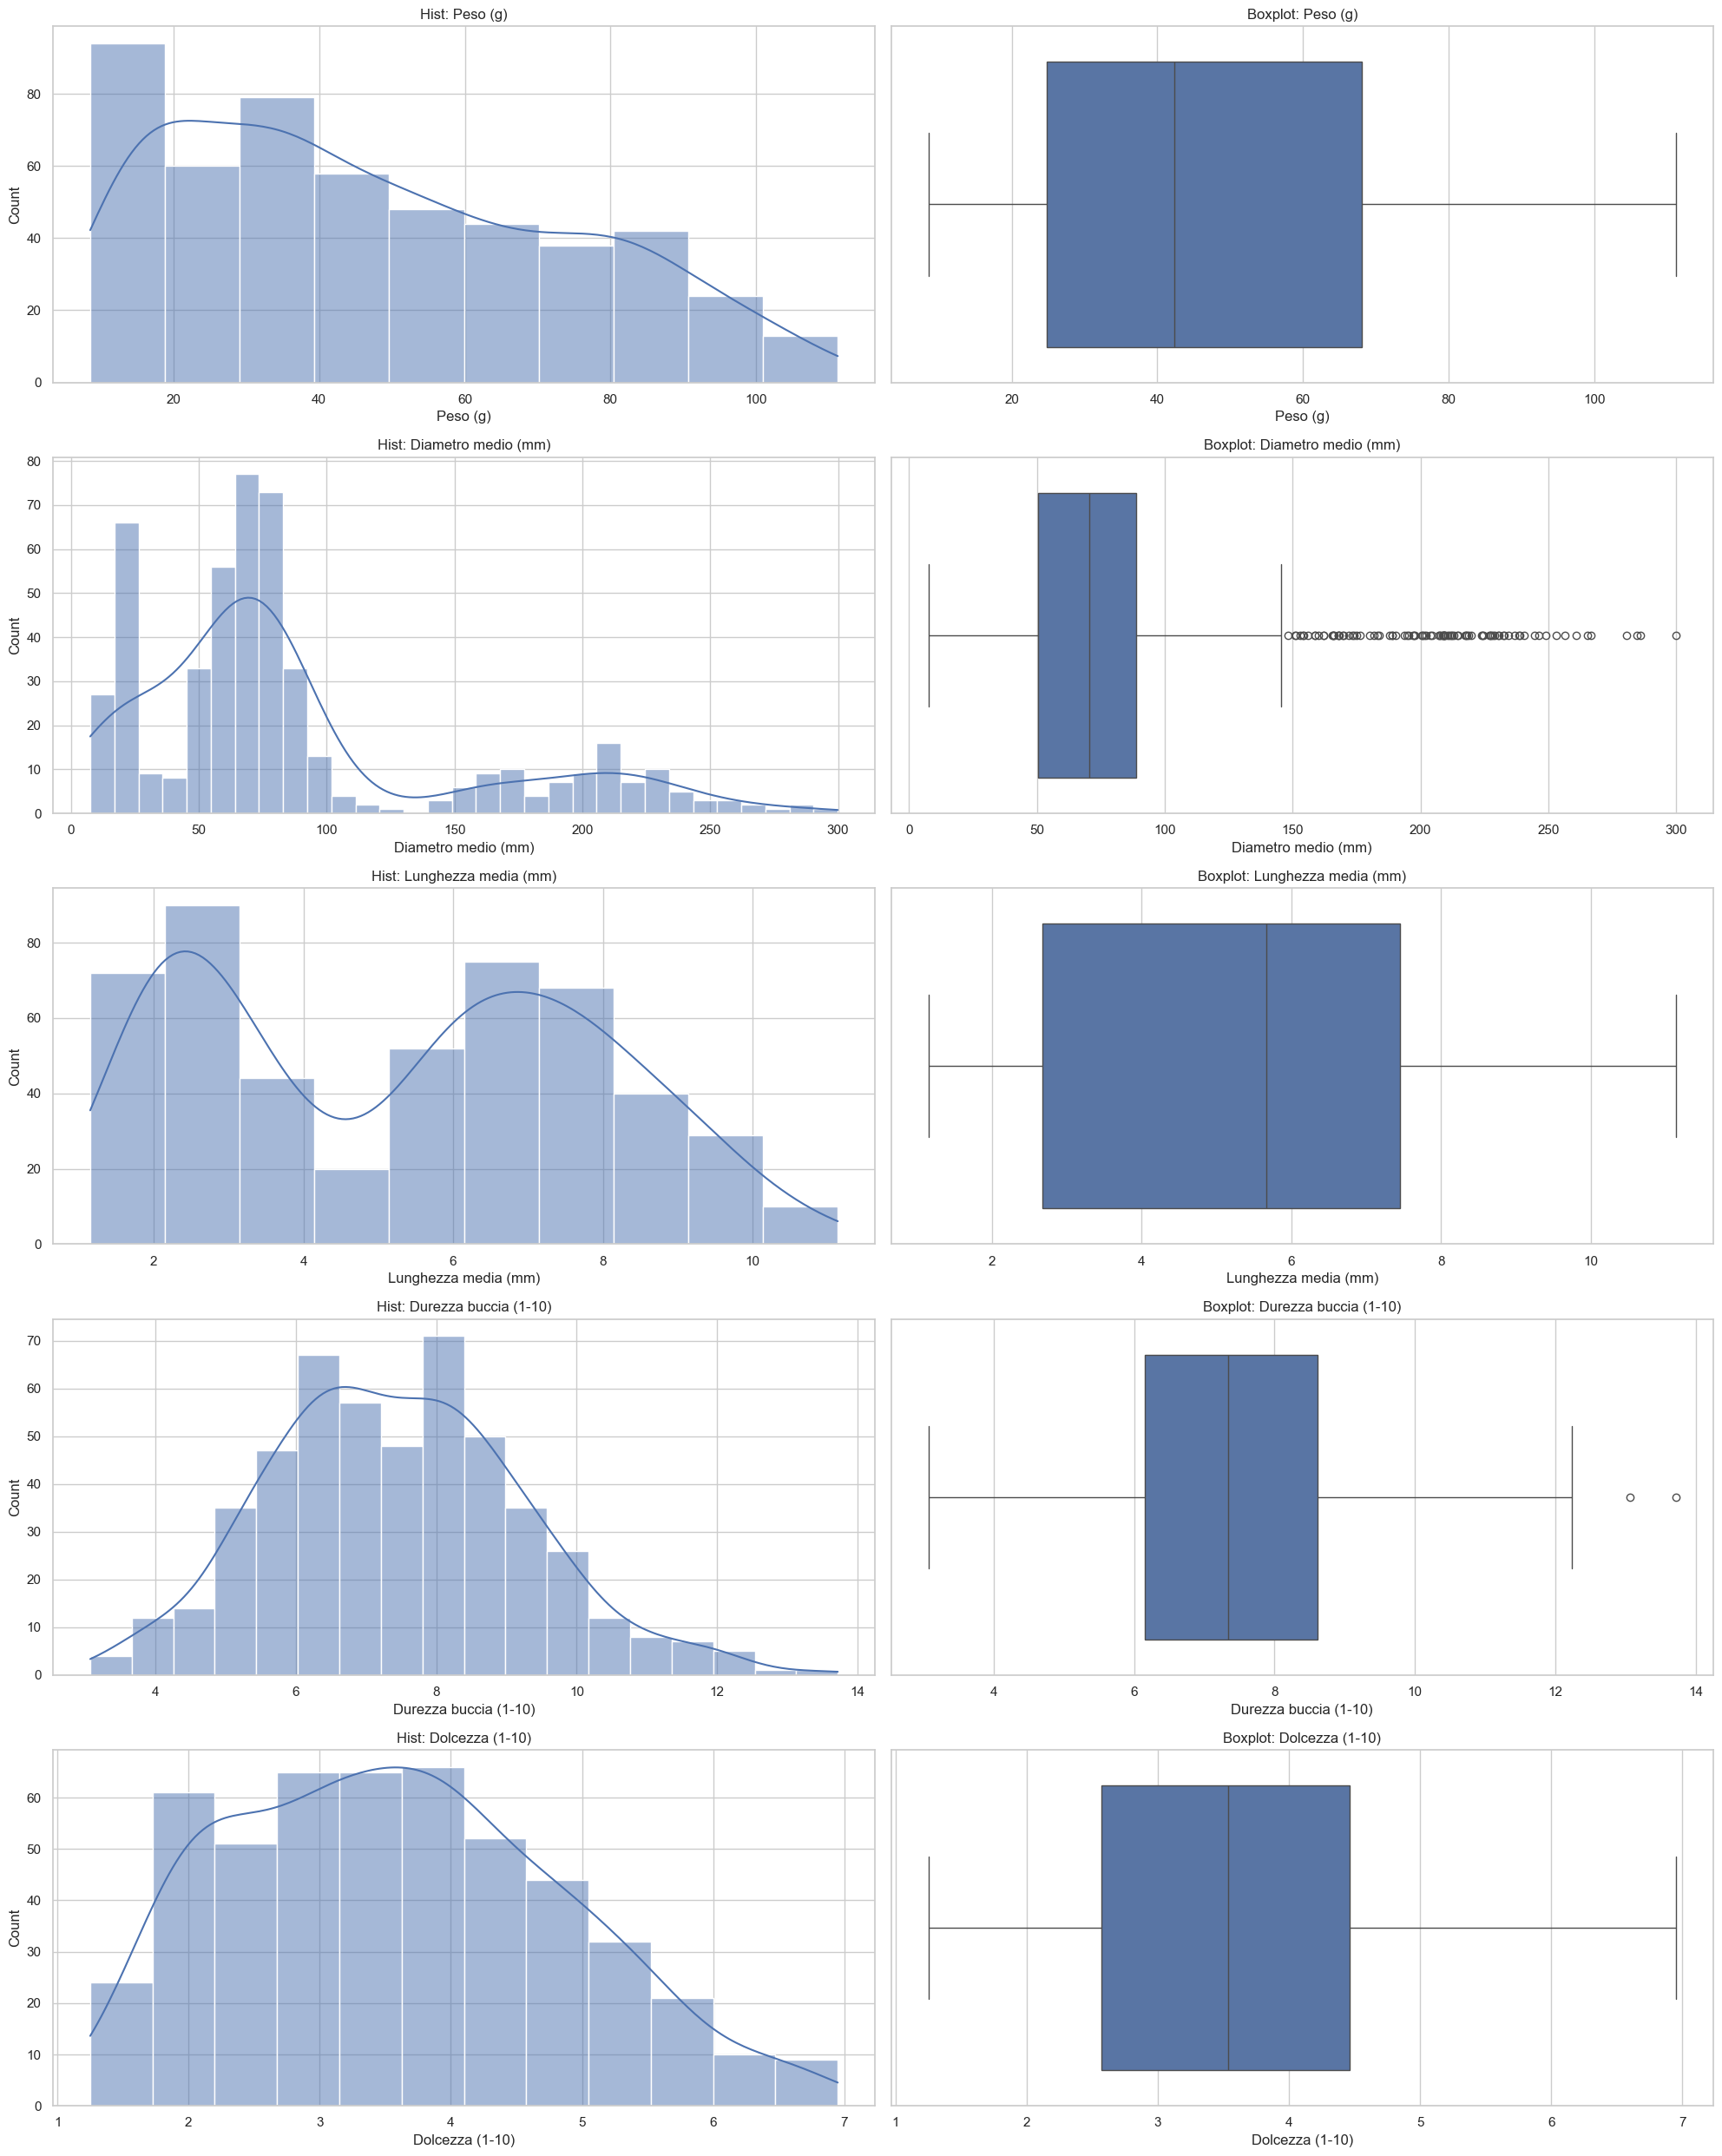

In [7]:
num_features = len(num)
plt.figure(figsize=(20, 5 * num_features))

for i, feature in enumerate(num):
    # Histogram
    plt.subplot(num_features, 2, 2*i + 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Hist: {feature}')

    # Boxplot
    plt.subplot(num_features, 2, 2*i + 2)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot: {feature}')

plt.tight_layout()
plt.show()


The plots above show both the histograms (with KDE curves) and boxplots for each variable in the dataset.  

- **Peso (g):**  
  The distribution is right-skewed, with most samples concentrated between 20g and 60g. A few heavier specimens reach over 100g, but no extreme outliers are present in the boxplot.  

- **Diametro medio (mm):**  
  The distribution is bimodal, showing two main peaks around 50mm and 150mm. The boxplot reveals several high-value outliers above approximately 120mm, suggesting a heterogeneous population or measurement variability.  

- **Lunghezza media (mm):**  
  This variable also exhibits a bimodal pattern, with clusters around 3mm and 8mm. The spread is wide, but there are no evident extreme outliers in the boxplot.  

- **Durezza buccia (1–10):**  
  The distribution is approximately normal, centered around 6–8. A few mild outliers exist at higher hardness values, but overall the data is fairly consistent.  

- **Dolcezza (1–10):**  
  The distribution is slightly left-skewed, with most values between 2 and 5. The boxplot confirms a moderate spread without significant outliers.  

**Summary:**  
Overall, the data shows varying levels of skewness and multimodality, suggesting that different physical or biological subgroups might exist in the sample. Some variables (like average diameter) contain outliers that may require further cleaning or transformation before modeling.

Considering that the dataset is not large at the moment, I decide to keep the outliers.



Now let's take a look at the correlation between the numerical features

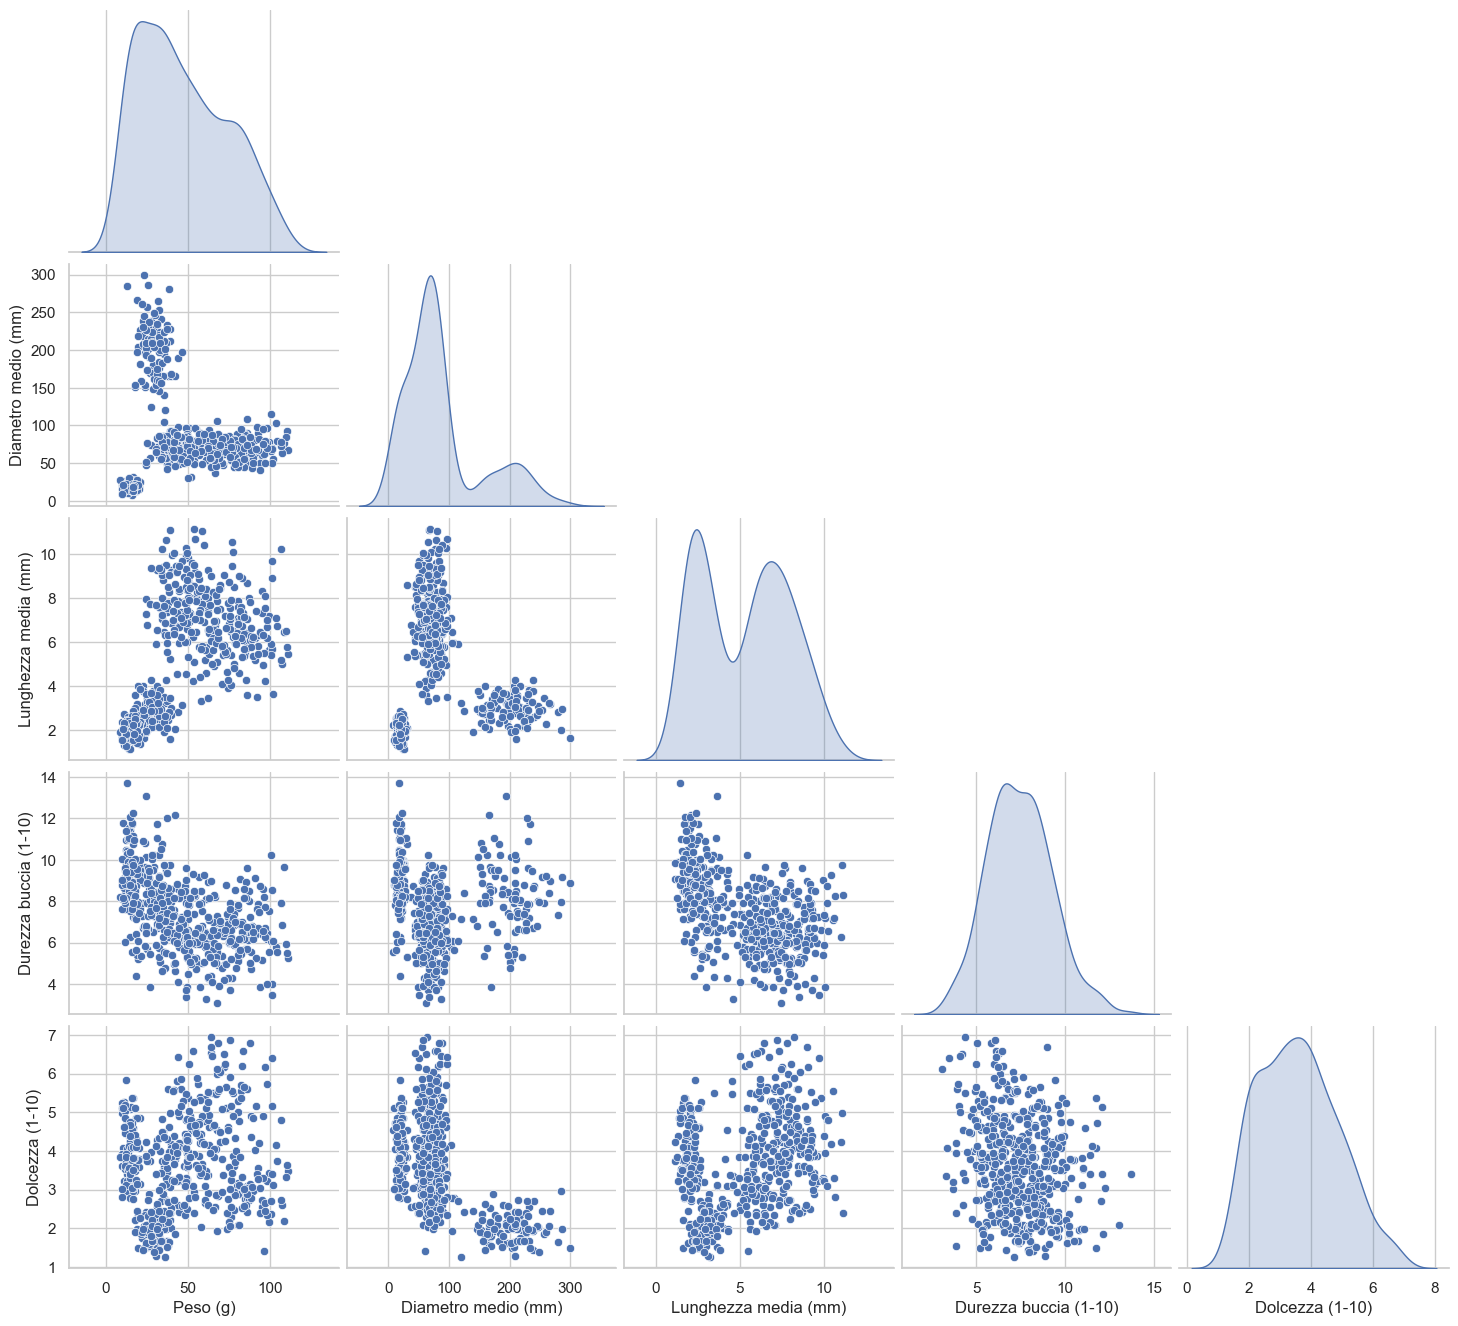

In [8]:
#first I draw a pairplot that will create a series of scatterplots, one for each combination of features
sns.pairplot(df[num], height=2.7, aspect=1.1, corner=True, diag_kind="kde")
plt.show()

The pairplot above visualizes the relationships between the main quantitative variables in the dataset, along with their individual distributions on the diagonal.

- **Univariate Distributions:**  
  The diagonal plots confirm the patterns observed earlier — several variables show skewed or bimodal distributions. In particular, *Diametro medio* and *Lunghezza media* have distinct clusters, possibly indicating the presence of different subgroups or measurement categories.

- **Peso vs. Other Variables:**  
  There is no clear linear relationship between *Peso* and the other variables, although a weak positive association may exist with *Diametro medio*. Most other variables appear scattered, suggesting limited correlation.

- **Diametro medio vs. Lunghezza media:**  
  The plot shows two distinct clusters, reinforcing the idea of two separate groups or species with different morphological traits.

- **Durezza buccia (1–10) and Dolcezza (1–10):**  
  These sensory variables show little to no visible correlation with the physical measurements. They are distributed fairly independently from size and weight features.


The pairplot highlights potential subpopulations within the dataset and confirms the lack of strong linear relationships among most variables. Further analysis (e.g., clustering or PCA) might help identify underlying group structures.


I now create a heatmap containing the exact values of the correlations. The scores are calculated using *the Pearson correlation index*, which determines the covariance between variables. <br>
Scores closer to 1 will indicate a strong positive correlation, i.e. as the value of one feature increases, so will the value of the other feature. Conversely, scores close to -1 will indicate a negative correlation (as the value of one feature increases, the value of the other feature decreases). <br>
Scores close to 0 indicate no correlation.

In [9]:
#create a table with the correlation values
#the 'corr()' method uses Pearson's coefficient by default to study the covariance between features
fig = px.imshow(round(df[num].corr(),2), text_auto=True, title="Correlations between numerical features - Pearson",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r,
                color_continuous_midpoint=0,aspect="auto")
fig.show()

The heatmap above displays the Pearson correlation coefficients between the numerical variables in the dataset. The values range from -1 (strong negative correlation) to +1 (strong positive correlation).

- **Peso (g)** shows a **moderate positive correlation** with *Lunghezza media* (0.58), indicating that heavier samples tend to be longer. It also has a **moderate negative correlation** with *Durezza buccia* (-0.49), suggesting that heavier items generally have a softer skin.  
- **Diametro medio (mm)** is **negatively correlated** with *Dolcezza* (-0.57), meaning that larger diameters tend to be associated with lower sweetness values.  
- **Lunghezza media (mm)** and *Dolcezza* have a **weak positive correlation** (0.33), implying that longer samples might be slightly sweeter on average.  
- The correlations involving *Durezza buccia* and *Dolcezza* are mostly weak to moderate, showing that texture and sweetness are not strongly related to size or weight in this dataset.

Overall, the correlation matrix reveals that only a few relationships are moderately strong (e.g., between *Peso* and *Lunghezza media*). Most features show low or moderate correlations, suggesting that they provide complementary, rather than redundant, information about the samples.


Let us now try to use different specific statistical tests to further support what has been highlighted so far.

Categories in target variable:
Frutto
Mela       100
Banana     100
Arancia    100
Uva        100
Kiwi       100
Name: count, dtype: int64 

Feature: Peso (g)
  Shapiro-Wilk test for normality per group:
   Mela: p-value=0.0247
   Banana: p-value=0.9913
   Arancia: p-value=0.1971
   Uva: p-value=0.1827
   Kiwi: p-value=0.3382
  Kruskal-Wallis test: stat=433.8461, p-value=0.0000
  => At least one group differs significantly from the others.



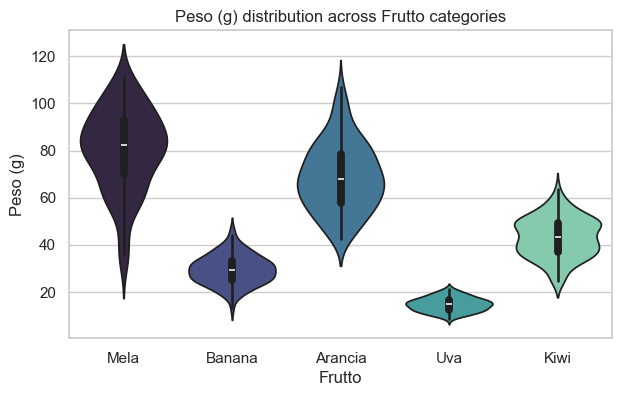

Feature: Diametro medio (mm)
  Shapiro-Wilk test for normality per group:
   Mela: p-value=0.7807
   Banana: p-value=0.4654
   Arancia: p-value=0.4786
   Uva: p-value=0.8998
   Kiwi: p-value=0.0637
  Kruskal-Wallis test: stat=383.4493, p-value=0.0000
  => At least one group differs significantly from the others.



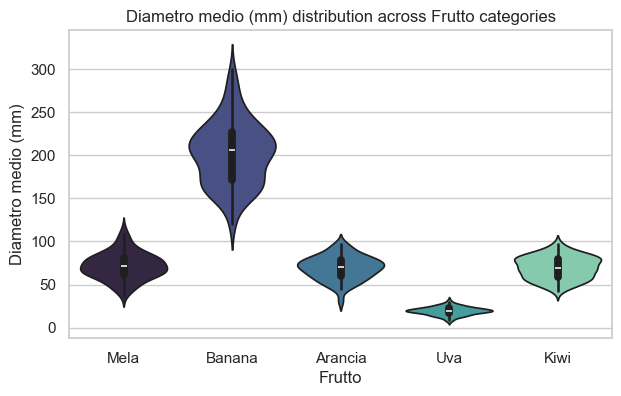

Feature: Lunghezza media (mm)
  Shapiro-Wilk test for normality per group:
   Mela: p-value=0.4025
   Banana: p-value=0.7982
   Arancia: p-value=0.8942
   Uva: p-value=0.7615
   Kiwi: p-value=0.5709
  Kruskal-Wallis test: stat=409.6948, p-value=0.0000
  => At least one group differs significantly from the others.



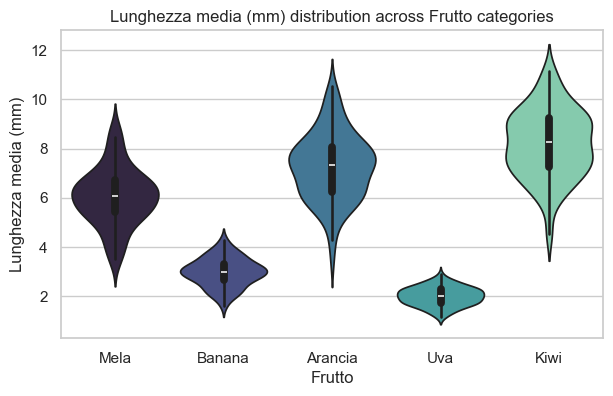

Feature: Durezza buccia (1-10)
  Shapiro-Wilk test for normality per group:
   Mela: p-value=0.3571
   Banana: p-value=0.6769
   Arancia: p-value=0.5015
   Uva: p-value=0.4676
   Kiwi: p-value=0.6238
  Kruskal-Wallis test: stat=191.1795, p-value=0.0000
  => At least one group differs significantly from the others.



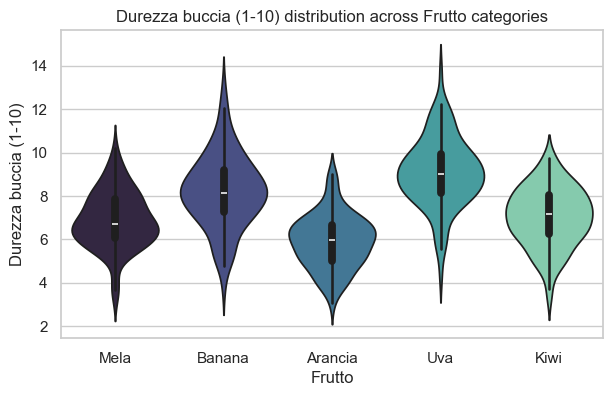

Feature: Dolcezza (1-10)
  Shapiro-Wilk test for normality per group:
   Mela: p-value=0.7968
   Banana: p-value=0.3871
   Arancia: p-value=0.6225
   Uva: p-value=0.0088
   Kiwi: p-value=0.3215
  Kruskal-Wallis test: stat=358.2372, p-value=0.0000
  => At least one group differs significantly from the others.



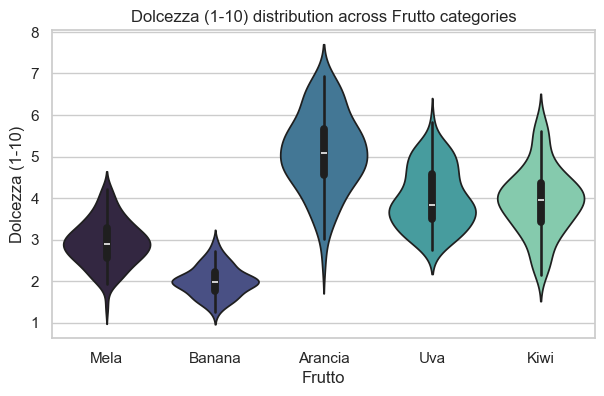

In [10]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set the variables
target_col = str(target[0])
features = num

# Examine the categories present in the target
print("Categories in target variable:")
print(df[target_col].value_counts(), "\n")

# Number of categories
n_classes = df[target_col].nunique()

# Statistical test: t-test if binary, Kruskal-Wallis if more than two categories
for feature in features:
    print(f"Feature: {feature}")

    # Create groups for each target category
    groups = [df[df[target_col] == level][feature] for level in df[target_col].unique()]

    # Check the normality of the feature in groups (Shapiro-Wilk)
    print("  Shapiro-Wilk test for normality per group:")
    for i, level in enumerate(df[target_col].unique()):
        stat, p = stats.shapiro(groups[i])
        print(f"   {level}: p-value={p:.4f}")

    # If the target is binary → use t-test or Mann–Whitney
    if n_classes == 2:
        group_names = df[target_col].unique()
        group1, group2 = groups[0], groups[1]
        # Use Mann-Whitney (robust even if not normal)
        stat, p = stats.mannwhitneyu(group1, group2)
        print(f"  Mann-Whitney U test: stat={stat:.4f}, p-value={p:.4f}")
        if p < 0.05:
            print("  => Significant difference between the two groups.\n")
        else:
            print("  => No significant difference between groups.\n")

    # If the target has more than two categories → use Kruskal-Wallis
    else:
        stat, p = stats.kruskal(*groups)
        print(f"  Kruskal-Wallis test: stat={stat:.4f}, p-value={p:.4f}")
        if p < 0.05:
            print("  => At least one group differs significantly from the others.\n")
        else:
            print("  => No significant difference among groups.\n")

    # Display the distribution with a violin plot
    plt.figure(figsize=(7, 4))
    sns.violinplot(x=target_col, y=feature, data=df, palette='mako')
    plt.title(f'{feature} distribution across {target_col} categories')
    plt.xlabel(target_col)
    plt.ylabel(feature)
    plt.show()



The dataset includes five fruit categories — Apple, Banana, Orange, Grape, and Kiwi — each with 100 samples.

For each feature, the Shapiro–Wilk test was used to assess normality within each fruit group, and the Kruskal–Wallis test was applied to evaluate differences between groups.

Normality:
Most groups show p-values > 0.05, indicating approximate normality for many features, although some deviations occur (e.g., Apple weight and Grape sweetness).
Given these results, the non-parametric Kruskal–Wallis test is appropriate for comparing groups.

Between-group differences:
For all features — Weight, Average Diameter, Average Length, Skin Hardness, and Sweetness — the Kruskal–Wallis test returned p < 0.001, suggesting that at least one fruit category significantly differs from the others for each feature.

Conclusion:
Each measured feature shows significant differences across fruit types, meaning these variables likely have strong discriminative power for classifying fruits.

<a id="8"> </a>
### 3. Preprocessing

<a id="9"> </a>
#### 3.1. Target encoding and Preprocessing pipeline with column transformer

In [11]:
RANDOM_STATE = 42
X = df.drop(columns=['Frutto']).copy()
y = df['Frutto'].copy()

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Train-test split before preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=RANDOM_STATE,shuffle=True, stratify=y_enc)

# Pipeline for numeric features
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num)
])

preprocessor
print('Preprocessors built.')

Preprocessors built.


<a id="10"> </a>
### 4. Machine Learning: creation of the predictive model

<a id="11"> </a>
### 4.1 Baseline Pipeline with KNN

In [12]:
# Pipeline full (preprocessing + model)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit on train set
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")

# Report for each class
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Accuracy : 0.920
Precision: 0.924
Recall   : 0.920

Classification report:

              precision    recall  f1-score   support

     Arancia       0.78      0.90      0.84        20
      Banana       1.00      1.00      1.00        20
        Kiwi       0.89      0.85      0.87        20
        Mela       0.94      0.85      0.89        20
         Uva       1.00      1.00      1.00        20

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



The KNN classifier achieved strong overall performance across the five fruit categories.
Key metrics on the test set are as follows:

Accuracy: 0.920

Precision: 0.924

Recall: 0.920

These values indicate that the model correctly classifies most samples, with balanced precision and recall, showing no major bias toward any specific class.

Banana and Grape (Uva) were classified perfectly (precision = recall = 1.00), suggesting their features are distinct and easily separable.

Orange (Arancia) and Apple (Mela) show slightly lower recall values, indicating occasional misclassifications between these two classes—possibly due to overlapping feature distributions.

Kiwi achieved solid performance overall, though with minor confusion in some cases.


The model demonstrates excellent generalization with consistent results across all classes.
Minor errors are mainly limited to fruits with similar characteristics (e.g., oranges and apples).
Further improvements could be explored by fine-tuning the KNN hyperparameters or testing alternative distance metrics.

<a id="12"> </a>
#### 4.2. Hyperparameter tuning

In [13]:
# ----------------------------------
# Objective function for Optuna
# ----------------------------------
def objective(trial):
    """
    Objective function for Optuna hyperparameter optimization of a KNN classifier.

    This function defines the search space for the K-Nearest Neighbors (KNN)
    hyperparameters and evaluates each candidate configuration using
    Stratified K-Fold cross-validation to ensure balanced class representation
    across folds. The goal is to maximize the mean cross-validated accuracy.

    Parameters
    ----------
    trial : optuna.trial.Trial
        A single trial object that provides methods for suggesting hyperparameter
        values from predefined search spaces.

    Returns
    -------
    float
        The mean cross-validation accuracy score obtained across all folds
        for the current hyperparameter configuration.

    Notes
    -----
    - The hyperparameters optimized are:
        * ``n_neighbors`` : int — number of neighbors to use.
        * ``weights`` : {'uniform', 'distance'} — weight function used in prediction.
        * ``p`` : int — power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean).
    - Uses ``StratifiedKFold`` to preserve class proportions across splits.
    - The pipeline includes both preprocessing and model training steps.
    """
    # Research space for hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 3, 25)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  # 1 = Manhattan, 2 = Euclidean

    # pipeline KNN
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights=weights,
            p=p
        ))
    ])

    # Stratified K-Fold CV (in order to maintain proportions between classes)
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=RANDOM_STATE)

    # Median recall on 2 fold
    scores = cross_val_score(
        model, X_train, y_train,
        cv=skf,
        scoring=make_scorer(accuracy_score)
    )

    return np.mean(scores)

# ----------------------------------
# Run research with Optuna
# ----------------------------------
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80, show_progress_bar=True)

print("\nBest hyperparameters:")
print(study.best_params)
print(f"Best CV accuracy: {study.best_value:.4f}")


[I 2025-10-19 14:07:35,755] A new study created in memory with name: no-name-1848e356-939e-48d4-b7cc-89fb87f3e1d5
Best trial: 0. Best value: 0.92:   0%|          | 0/80 [00:00<?, ?it/s]

[I 2025-10-19 14:07:35,855] Trial 0 finished with value: 0.92 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.92.


Best trial: 1. Best value: 0.925:   2%|▎         | 2/80 [00:00<00:07,  9.87it/s]

[I 2025-10-19 14:07:35,960] Trial 1 finished with value: 0.925 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.925.


Best trial: 2. Best value: 0.9325:   4%|▍         | 3/80 [00:00<00:07,  9.80it/s]

[I 2025-10-19 14:07:36,056] Trial 2 finished with value: 0.9325 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.9325.


Best trial: 2. Best value: 0.9325:   5%|▌         | 4/80 [00:00<00:07,  9.74it/s]

[I 2025-10-19 14:07:36,156] Trial 3 finished with value: 0.925 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.9325.


Best trial: 4. Best value: 0.935:   5%|▌         | 4/80 [00:00<00:07,  9.74it/s] 

[I 2025-10-19 14:07:36,263] Trial 4 finished with value: 0.935 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'p': 1}. Best is trial 4 with value: 0.935.


Best trial: 4. Best value: 0.935:   8%|▊         | 6/80 [00:00<00:07, 10.10it/s]

[I 2025-10-19 14:07:36,359] Trial 5 finished with value: 0.935 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'p': 1}. Best is trial 4 with value: 0.935.


Best trial: 6. Best value: 0.9375:   9%|▉         | 7/80 [00:00<00:07, 10.10it/s]

[I 2025-10-19 14:07:36,438] Trial 6 finished with value: 0.9375 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.
[I 2025-10-19 14:07:36,534] Trial 7 finished with value: 0.9325000000000001 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'p': 2}. Best is trial 6 with value: 0.9375.


Best trial: 6. Best value: 0.9375:  12%|█▎        | 10/80 [00:00<00:06, 10.58it/s]

[I 2025-10-19 14:07:36,638] Trial 8 finished with value: 0.9275 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 2}. Best is trial 6 with value: 0.9375.
[I 2025-10-19 14:07:36,730] Trial 9 finished with value: 0.9325 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.


Best trial: 6. Best value: 0.9375:  15%|█▌        | 12/80 [00:01<00:07,  9.69it/s]

[I 2025-10-19 14:07:36,853] Trial 10 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.
[I 2025-10-19 14:07:36,965] Trial 11 finished with value: 0.9225000000000001 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.


Best trial: 6. Best value: 0.9375:  18%|█▊        | 14/80 [00:01<00:07,  8.91it/s]

[I 2025-10-19 14:07:37,094] Trial 12 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.
[I 2025-10-19 14:07:37,219] Trial 13 finished with value: 0.9375 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'p': 1}. Best is trial 6 with value: 0.9375.


Best trial: 6. Best value: 0.9375:  20%|██        | 16/80 [00:01<00:07,  8.74it/s]

[I 2025-10-19 14:07:37,346] Trial 14 finished with value: 0.935 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}. Best is trial 6 with value: 0.9375.
[I 2025-10-19 14:07:37,459] Trial 15 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 1}. Best is trial 6 with value: 0.9375.


Best trial: 16. Best value: 0.945:  22%|██▎       | 18/80 [00:01<00:07,  8.37it/s]

[I 2025-10-19 14:07:37,595] Trial 16 finished with value: 0.945 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:37,711] Trial 17 finished with value: 0.935 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  25%|██▌       | 20/80 [00:02<00:07,  8.14it/s]

[I 2025-10-19 14:07:37,849] Trial 18 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:37,966] Trial 19 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  28%|██▊       | 22/80 [00:02<00:07,  7.99it/s]

[I 2025-10-19 14:07:38,094] Trial 20 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 2}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:38,220] Trial 21 finished with value: 0.935 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  30%|███       | 24/80 [00:02<00:07,  7.93it/s]

[I 2025-10-19 14:07:38,361] Trial 22 finished with value: 0.94 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:38,475] Trial 23 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  32%|███▎      | 26/80 [00:02<00:06,  7.89it/s]

[I 2025-10-19 14:07:38,602] Trial 24 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:38,730] Trial 25 finished with value: 0.9325 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  35%|███▌      | 28/80 [00:03<00:06,  7.88it/s]

[I 2025-10-19 14:07:38,862] Trial 26 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:38,986] Trial 27 finished with value: 0.935 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  38%|███▊      | 30/80 [00:03<00:06,  7.76it/s]

[I 2025-10-19 14:07:39,118] Trial 28 finished with value: 0.94 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:39,239] Trial 29 finished with value: 0.9325 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 2}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  40%|████      | 32/80 [00:03<00:06,  7.69it/s]

[I 2025-10-19 14:07:39,383] Trial 30 finished with value: 0.9425 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:39,511] Trial 31 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  42%|████▎     | 34/80 [00:04<00:06,  7.59it/s]

[I 2025-10-19 14:07:39,653] Trial 32 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:39,782] Trial 33 finished with value: 0.9375 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  45%|████▌     | 36/80 [00:04<00:06,  7.28it/s]

[I 2025-10-19 14:07:39,923] Trial 34 finished with value: 0.935 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:40,065] Trial 35 finished with value: 0.9325 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 2}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  48%|████▊     | 38/80 [00:04<00:05,  7.55it/s]

[I 2025-10-19 14:07:40,201] Trial 36 finished with value: 0.9275 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:40,319] Trial 37 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  49%|████▉     | 39/80 [00:04<00:05,  7.59it/s]

[I 2025-10-19 14:07:40,450] Trial 38 finished with value: 0.925 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  51%|█████▏    | 41/80 [00:05<00:05,  6.94it/s]

[I 2025-10-19 14:07:40,661] Trial 39 finished with value: 0.92 and parameters: {'n_neighbors': 24, 'weights': 'uniform', 'p': 2}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:40,779] Trial 40 finished with value: 0.935 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  54%|█████▍    | 43/80 [00:05<00:05,  6.92it/s]

[I 2025-10-19 14:07:40,921] Trial 41 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:41,068] Trial 42 finished with value: 0.9425 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  56%|█████▋    | 45/80 [00:05<00:04,  7.05it/s]

[I 2025-10-19 14:07:41,223] Trial 43 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:41,350] Trial 44 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  59%|█████▉    | 47/80 [00:05<00:04,  7.02it/s]

[I 2025-10-19 14:07:41,494] Trial 45 finished with value: 0.9375 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:41,637] Trial 46 finished with value: 0.9275 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  61%|██████▏   | 49/80 [00:06<00:04,  7.54it/s]

[I 2025-10-19 14:07:41,769] Trial 47 finished with value: 0.935 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:41,893] Trial 48 finished with value: 0.945 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  64%|██████▍   | 51/80 [00:06<00:03,  7.48it/s]

[I 2025-10-19 14:07:42,036] Trial 49 finished with value: 0.9375 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:42,171] Trial 50 finished with value: 0.925 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  66%|██████▋   | 53/80 [00:06<00:03,  7.72it/s]

[I 2025-10-19 14:07:42,292] Trial 51 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:42,419] Trial 52 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  69%|██████▉   | 55/80 [00:06<00:03,  7.81it/s]

[I 2025-10-19 14:07:42,548] Trial 53 finished with value: 0.9225000000000001 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:42,675] Trial 54 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  71%|███████▏  | 57/80 [00:07<00:03,  7.64it/s]

[I 2025-10-19 14:07:42,819] Trial 55 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:42,946] Trial 56 finished with value: 0.9425 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  74%|███████▍  | 59/80 [00:07<00:02,  7.76it/s]

[I 2025-10-19 14:07:43,074] Trial 57 finished with value: 0.935 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:43,200] Trial 58 finished with value: 0.935 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  76%|███████▋  | 61/80 [00:07<00:02,  7.60it/s]

[I 2025-10-19 14:07:43,343] Trial 59 finished with value: 0.9325 and parameters: {'n_neighbors': 22, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:43,473] Trial 60 finished with value: 0.9375 and parameters: {'n_neighbors': 13, 'weights': 'uniform', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  79%|███████▉  | 63/80 [00:07<00:02,  7.53it/s]

[I 2025-10-19 14:07:43,615] Trial 61 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:43,747] Trial 62 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  81%|████████▏ | 65/80 [00:08<00:02,  7.31it/s]

[I 2025-10-19 14:07:43,874] Trial 63 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:44,013] Trial 64 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  84%|████████▍ | 67/80 [00:08<00:01,  7.33it/s]

[I 2025-10-19 14:07:44,156] Trial 65 finished with value: 0.9375 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:44,296] Trial 66 finished with value: 0.925 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  86%|████████▋ | 69/80 [00:08<00:01,  7.33it/s]

[I 2025-10-19 14:07:44,442] Trial 67 finished with value: 0.935 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:44,569] Trial 68 finished with value: 0.94 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  89%|████████▉ | 71/80 [00:09<00:01,  7.31it/s]

[I 2025-10-19 14:07:44,696] Trial 69 finished with value: 0.9275 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 2}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:44,840] Trial 70 finished with value: 0.9325 and parameters: {'n_neighbors': 24, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  91%|█████████▏| 73/80 [00:09<00:01,  6.97it/s]

[I 2025-10-19 14:07:44,998] Trial 71 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:45,142] Trial 72 finished with value: 0.945 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  94%|█████████▍| 75/80 [00:09<00:00,  7.31it/s]

[I 2025-10-19 14:07:45,277] Trial 73 finished with value: 0.9299999999999999 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:45,398] Trial 74 finished with value: 0.935 and parameters: {'n_neighbors': 21, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  96%|█████████▋| 77/80 [00:09<00:00,  7.45it/s]

[I 2025-10-19 14:07:45,526] Trial 75 finished with value: 0.935 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:45,653] Trial 76 finished with value: 0.9425 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945:  99%|█████████▉| 79/80 [00:10<00:00,  7.40it/s]

[I 2025-10-19 14:07:45,796] Trial 77 finished with value: 0.935 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'p': 1}. Best is trial 16 with value: 0.945.
[I 2025-10-19 14:07:45,934] Trial 78 finished with value: 0.935 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.


Best trial: 16. Best value: 0.945: 100%|██████████| 80/80 [00:10<00:00,  7.76it/s]

[I 2025-10-19 14:07:46,068] Trial 79 finished with value: 0.9375 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'p': 1}. Best is trial 16 with value: 0.945.

Best hyperparameters:
{'n_neighbors': 13, 'weights': 'distance', 'p': 1}
Best CV accuracy: 0.9450


The K-Nearest Neighbors (KNN) model was optimized using Optuna. The best hyperparameters found are:

- **Number of neighbors (`n_neighbors`)**: 19  
- **Weights (`weights`)**: distance  
- **Distance metric (`p`)**: 1 (Manhattan distance)  

With these hyperparameters, the model achieved a **best cross-validation accuracy of 0.945**, showing strong predictive performance.


In [14]:
best_params = study.best_params

best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(**best_params))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Metriche finali
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print(f"Test Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Test Recall   : {recall_score(y_test, y_pred, average='weighted'):.3f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Test Accuracy : 0.910
Test Precision: 0.922
Test Recall   : 0.910

Classification Report:

              precision    recall  f1-score   support

     Arancia       0.73      0.95      0.83        20
      Banana       1.00      1.00      1.00        20
        Kiwi       0.93      0.70      0.80        20
        Mela       0.95      0.90      0.92        20
         Uva       1.00      1.00      1.00        20

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



The K-Nearest Neighbors (KNN) model was evaluated on the test set. The overall metrics are:

- **Accuracy**: 0.910  
- **Precision (weighted)**: 0.922  
- **Recall (weighted)**: 0.910  

The classification report per class shows:

- **Arancia**: Precision 0.73, Recall 0.95, F1-score 0.83  
- **Banana**: Precision 1.00, Recall 1.00, F1-score 1.00  
- **Kiwi**: Precision 0.93, Recall 0.70, F1-score 0.80  
- **Mela**: Precision 0.95, Recall 0.90, F1-score 0.92  
- **Uva**: Precision 1.00, Recall 1.00, F1-score 1.00  

The model achieved an overall **accuracy of 91%**, with weighted average metrics showing strong performance across most classes.  
Some variation is observed in the recall for Kiwi (0.70), indicating that a few Kiwi samples were misclassified.

<a id="13"> </a>
#### 4.3. Confusion Matrix and ROC-AUC curve

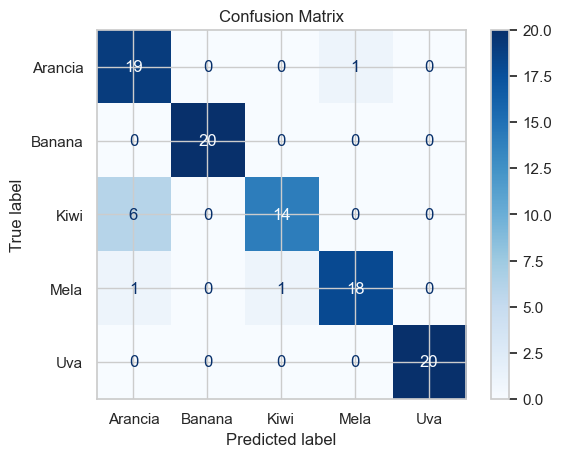

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


The provided image displays a **Confusion Matrix** for the classification model designed to distinguish between the five fruit classes: **Arancia** (Orange), **Banana**, **Kiwi**, **Mela** (Apple), and **Uva** (Grape).

A Confusion Matrix is a key metric for evaluating a classifier's performance. The rows represent the **True label** (actual class), and the columns represent the **Predicted label** (model's prediction).

#### Key Observations

* **Overall Performance:** The model shows **strong overall performance**, with high numbers concentrated along the main diagonal, indicating a high rate of correct classifications.
* **Total Samples:** Each class had a total of **20** samples in the test set.

#### Class-Specific Performance Breakdown

The table below summarizes the **Correct Predictions** (True Positives, TP) and **Misclassifications** (False Negatives, FN) for each fruit.

| Class | Total Samples | Correct Predictions (TP) | Accuracy | Major Error Type |
| :--- | :---: | :---: | :---: | :--- |
| **Banana** | 20 | **20** | **100%** | None |
| **Uva** | 20 | **20** | **100%** | None |
| **Mela** | 20 | 18 | 90% | Confused with **Arancia** (1) and **Kiwi** (1) |
| **Arancia** | 20 | 19 | 95% | Confused with **Mela** (1) |
| **Kiwi** | 20 | **14** | **70%** | **6** samples confused with **Arancia** |

#### Analysis of Errors and Strengths

1.  **Strengths:** The model achieved **perfect classification** for both **Banana** and **Uva** (100% accuracy).
2.  **Area for Improvement:** The **Kiwi** class is the model's primary weakness, with only **14** out of 20 samples correctly identified. The overwhelming error is the misclassification of **6 Kiwis as Arancia**. This suggests that the features used by the model are not strong enough to robustly distinguish between these two specific fruits.
3.  **Other Errors:** Minor confusion exists between **Arancia** and **Mela**, with 1 misclassification in each direction.

In summary, while the model is highly effective for most classes, focused effort should be directed toward **improving the distinction between Kiwi and Arancia**.


Macro-average ROC-AUC: 0.987


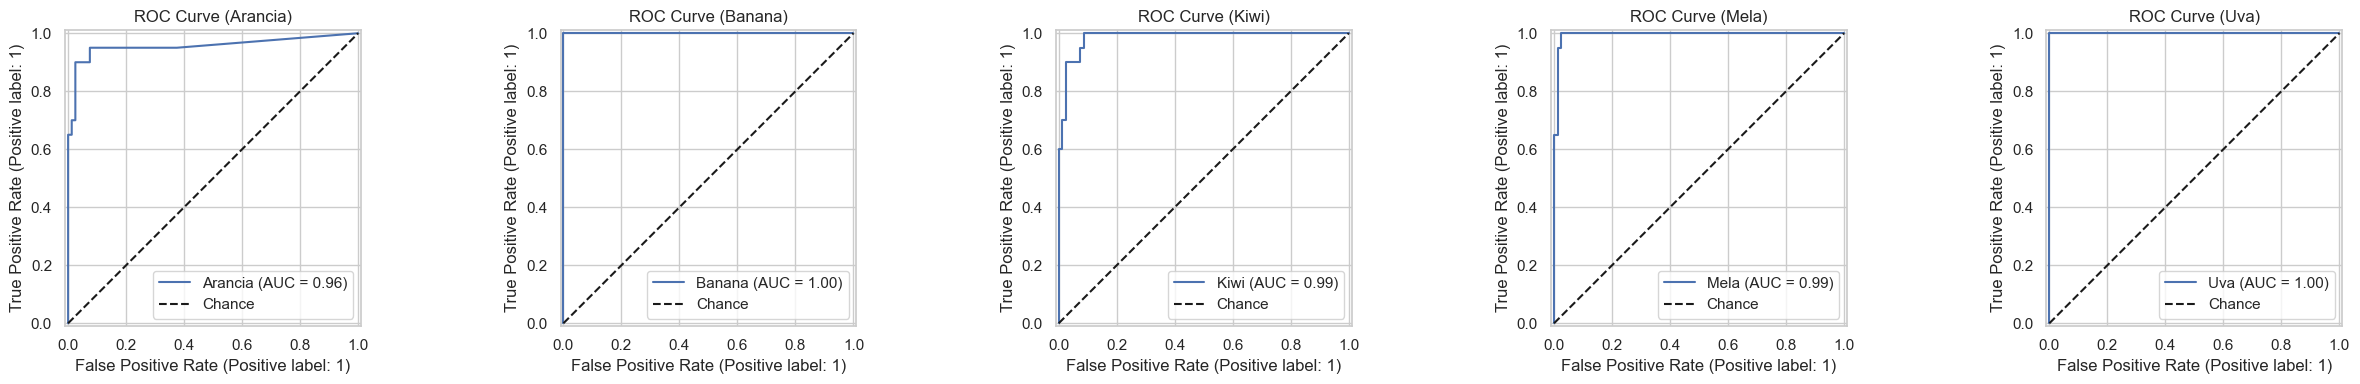

In [16]:
# Label binarization
y_test_bin = label_binarize(y_test, classes=np.arange(len(le.classes_)))

# Expected probabilities for each class
y_prob = best_model.predict_proba(X_test)

#  AUC macro (Every class counts equally, regardless of how many examples it has.)
auc_macro = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
print(f"Macro-average ROC-AUC: {auc_macro:.3f}")

# Creation of side-by-side subplots
n_classes = len(le.classes_)
fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 4))  # 1 row, n_classes columns

for i, class_name in enumerate(le.classes_):
    ax = axes[i] if n_classes > 1 else axes
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i], y_prob[:, i],
        name=f"{class_name}",
        ax=ax
    )
    ax.plot([0, 1], [0, 1], 'k--', label='Chance')
    ax.set_title(f"ROC Curve ({class_name})")
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()



These plots display a series of **Receiver Operating Characteristic (ROC) curves**, one for each of the five fruit classes: **Arancia**, **Banana**, **Kiwi**, **Mela**, and **Uva**.

The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings. The **Area Under the Curve (AUC)** is the primary metric used for interpretation, representing the degree or measure of separability. A higher AUC means the model is better at distinguishing between the positive and negative classes.


| Class | AUC Score | Performance Interpretation |
| :--- | :---: | :--- |
| **Banana** | **1.00** | **Perfect** classification (model has zero false positives/negatives) |
| **Uva** | **1.00** | **Perfect** classification (model has zero false positives/negatives) |
| **Kiwi** | $\mathbf{0.98}$ | **Excellent** performance; near-perfect separation. |
| **Mela** | $\mathbf{0.99}$ | **Excellent** performance; near-perfect separation. |
| **Arancia** | $\mathbf{0.96}$ | **Very Strong** performance, but slightly lower than the others. |

#### Interpretation of the plots

1.  **Perfect Classifiers (Banana and Uva):**
    * Both **Banana** and **Uva** show an AUC of **1.00**.
    * The blue curve instantly shoots up to the top-left corner (TPR = 1.0, FPR = 0.0) and stays there. This signifies a **perfect model** that can distinguish these two classes from all others with $100\%$ accuracy, regardless of the decision threshold, consistent with the $\text{20/20}$ correct predictions observed in the Confusion Matrix.

2.  **Excellent Classifiers (Kiwi and Mela):**
    * **Kiwi** and **Mela** achieve an impressive AUC of **0.99**.
    * The curves are nearly identical to the perfect ones, indicating the model makes very few errors when classifying these fruits against the rest.

3.  **Very Strong Classifier (Arancia):**
    * The **Arancia** class has an AUC of **0.96**. While this is still a **very strong** score, the curve shows a slight dip or curve before reaching the top-left.
    * This result is consistent with the minor misclassifications for **Arancia** noted in the Confusion Matrix (1 Arancia misclassified as Mela). An AUC of $0.96$ suggests that, across all possible thresholds, the model has a $95\%$ chance of correctly ranking a randomly chosen positive instance (Arancia) higher than a randomly chosen negative instance (not Arancia).


The ROC analysis confirms that the classification model exhibits **outstanding overall discrimination ability** across all five fruit classes, with four out of five classes achieving an AUC of $0.99$ or higher. The performance is essentially perfect for **Banana** and **Uva**. The small reduction in AUC for **Arancia** ($\mathbf{0.96}$) is the only minor indication of performance loss, confirming the minor confusion noted in the detailed Confusion Matrix analysis.


<a id="14"> </a>
#### 4.4. PCA decision regions

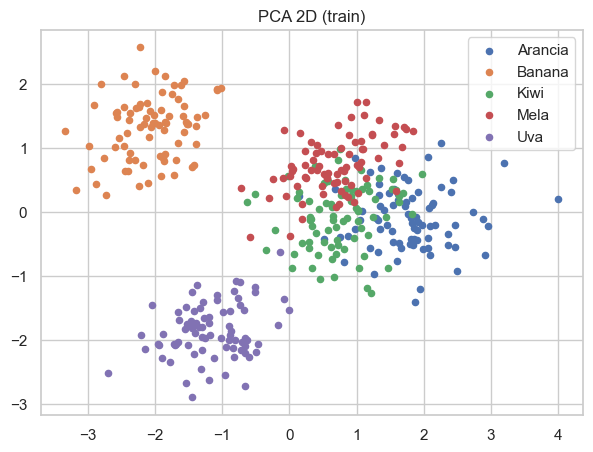

In [17]:
pca = PCA(n_components=2)
X_train_transformed = preprocessor.fit_transform(X_train)
X_pca = pca.fit_transform(X_train_transformed)

plt.figure(figsize=(7,5))
for i, label in enumerate(le.classes_):
    mask = (y_train==i)
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=label, s=20)
plt.legend(); plt.title('PCA 2D (train)'); plt.show()

The attached scatter plot displays the **2-Dimensional Principal Component Analysis (PCA)** projection of the training data. This process reduces the original feature space to two principal components (PC1 on the x-axis and PC2 on the y-axis), allowing us to visualize the inherent separability of the five fruit classes.

The goal of this visualization is to assess whether the classes form distinct, non-overlapping clusters.


#### PCA Visualization Analysis

1.  **Perfectly Separated Clusters (Banana and Uva):**
    * **Banana (Orange) **: This cluster is **tightly grouped** and completely isolated in the **upper-left quadrant** (approximately PC1: $-3$ to $-1$, PC2: $0$ to $2.2$).
    * **Uva (Purple) **: This cluster is also very well-defined and completely isolated in the **bottom-left quadrant** (approximately PC1: $-3$ to $-0.5$, PC2: $-2.5$ to $-1$).
    * **Conclusion:** The features used are highly effective at distinguishing **Banana** and **Uva** from all other classes, suggesting that a classifier should achieve **very high, possibly perfect, accuracy** for these two fruits.

2.  **Overlapping Central Clusters (Arancia, Mela, and Kiwi):**
    * **Arancia (Blue)**, **Mela (Red)**, and **Kiwi (Green)**: These three classes are heavily **interspersed and intermixed** across the central and right regions of the plot.
    * **Arancia** extends toward the right (PC1: $0$ to $3.5$), while **Mela** and **Kiwi** are concentrated in the busy central area (PC1: $-1$ to $2$).
    * **Significant Overlap:** There is no clear boundary separating these three groups; their data points are thoroughly mixed, particularly around the plot's center (PC1: $0$ to $1$, PC2: $-1$ to $1$).


#### Conclusion on Feature Discriminatory Power

This PCA plot provides strong validation for classification performance:

* **High Performance Expected (Banana & Uva):** The distinct, non-overlapping clusters confirm that the features enable **easy and reliable classification** of these two fruits.
* **Weak Performance Expected (Arancia, Mela, & Kiwi):** The significant overlap among these three classes in the central region suggests that a model will **struggle to differentiate** between **Arancia**, **Mela**, and **Kiwi**, leading to confusion and lower accuracy scores among them.

The visualization confirms that the current feature set is **highly effective** at separating **Banana** and **Uva**, but **lacks the required discriminatory power** to clearly separate the heavily overlapping cluster of **Arancia**, **Mela**, and **Kiwi**.

<a id="15"> </a>
### 5. Interpretability with SHAP

ExactExplainer explainer: 501it [01:24,  5.89it/s]                         


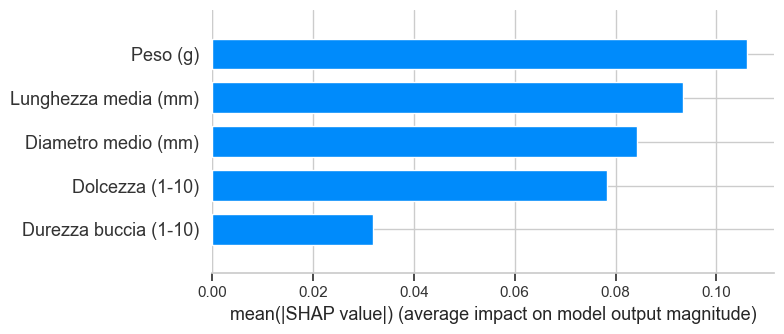

In [18]:
# ---------------------------------
# Preprocessing + fit KNN
# ---------------------------------
X_proc = preprocessor.fit_transform(X)

knn = KNeighborsClassifier(**study.best_params)
knn.fit(X_proc, y_enc)

# ---------------------------------
# SHAP Explainer
# ---------------------------------
def model_fn(x):
    x_df = pd.DataFrame(x, columns=X.columns)
    x_proc = preprocessor.transform(x_df)
    return knn.predict_proba(x_proc)

explainer = shap.Explainer(model_fn, X)
shap_values = explainer(X)

# ---------------------------------
# Calculation of absolute mean SHAP value across all classes
# ---------------------------------
# shap_values.values.shape = (n_samples, n_features, n_classes)
mean_shap = np.abs(shap_values.values).mean(axis=2)  # absolute average across all classes

# Summary plot (aggregate)
shap.summary_plot(
    mean_shap,
    X,
    feature_names=num,
    plot_type='bar'
)





The horizontal bar chart visualizes the **global feature importance** for the classification model, calculated using the average magnitude of the **SHAP (SHapley Additive exPlanations) values**.

The SHAP value for a feature represents its contribution to the model's prediction for a specific instance. By taking the average absolute (magnitude) SHAP value across the entire dataset, we determine which features have the **greatest average impact** on the magnitude of the model's output (i.e., its certainty or likelihood of a prediction).

The chart ranks the five features from most to least important:

1.  **Peso (g) - Weight (g):** This is the **most important feature**, with the highest mean SHAP value (approximately 0.105). This confirms that the **weight** of the fruit is the single most influential factor in determining its predicted class.
2.  **Lunghezza media (mm) - Average Length (mm):** This is the **second most important feature** (around 0.095).
3.  **Diametro medio (mm) - Average Diameter (mm):** This feature ranks closely as the **third most important** (around 0.083).
4.  **Dolcezza (1-10) - Sweetness (1-10):** This is the **fourth most important feature** (around 0.078).
5.  **Durezza buccia (1-10) - Skin Hardness (1-10):** This is the **least important feature**, with a significantly lower mean SHAP value (around 0.03).

#### Interpretation and Correlation

* **Dominance of Physical Dimensions:** The top three most influential features—**Weight, Average Length, and Average Diameter**—are all related to the **physical size and dimensions** of the fruit. This aligns with the visual separation observed in the PCA plot, where **Banana** and **Uva** (which typically have very distinct size characteristics) were perfectly separated.
* **Secondary Role of Sensory Attributes:** **Sweetness** is the most important non-dimensional feature, but it still ranks below the top three size metrics.
* **Least Impactful Feature:** **Skin Hardness** has a minimal average impact on the model's prediction, suggesting it is the least useful feature for overall class discrimination.


The SHAP analysis clearly indicates that the model heavily relies on the **physical dimensions** of the fruits, particularly their **Weight**. When considering feature engineering or data collection efforts, the focus should be on ensuring the high quality and accuracy of the **Peso (g)** and **Lunghezza media (mm)** features, as they provide the most predictive power. Conversely, **Durezza buccia (1-10)** could be considered for potential removal if model complexity needs to be reduced without a significant drop in performance.


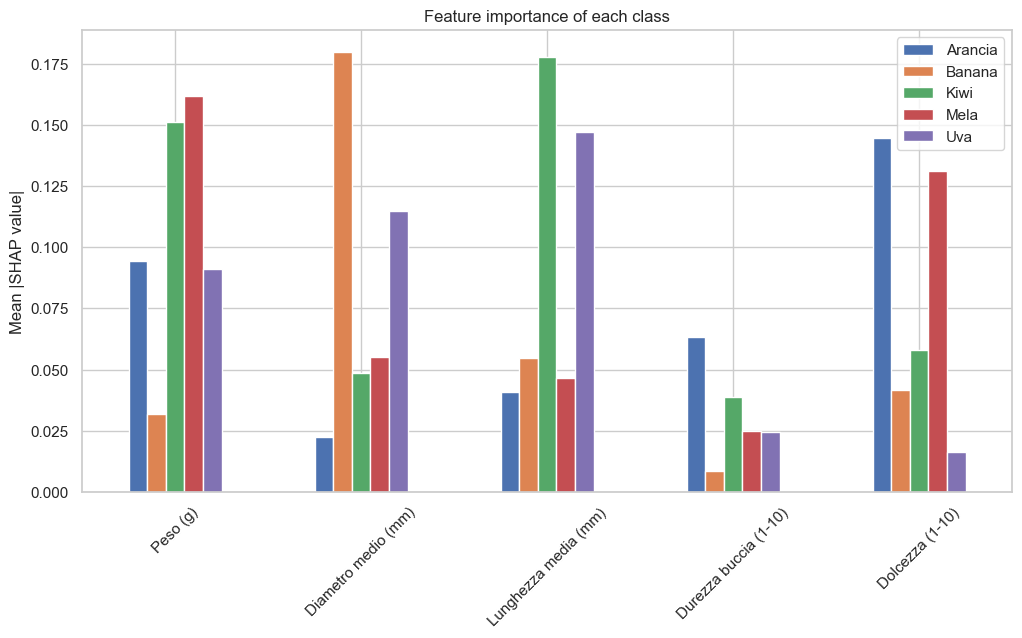

In [19]:
mean_shap_per_class = np.abs(shap_values.values).mean(axis=0)  # absolute mean for each feature, separated by class
df_shap = pd.DataFrame(mean_shap_per_class, index=num, columns=le.classes_)

df_shap.plot(kind='bar', figsize=(12,6))
plt.xticks(rotation=45)
plt.ylabel("Mean |SHAP value|")
plt.title("Feature importance of each class")
plt.show()

This bar chart visualizes the **class-specific feature importance**, showing the average magnitude of the **SHAP (SHapley Additive exPlanations) values** for each feature broken down by fruit class. A higher Mean $|\text{SHAP value}|$ indicates that the feature has a **stronger impact** on the model's prediction for that specific class.


#### Class-Specific Feature Drivers

By examining the chart, we can identify the most distinguishing feature the model uses for each fruit:

| Class | Most Important Feature | Mean \|SHAP value\| | Second Most Important Feature |
| :--- | :--- | :---: | :--- |
| **Banana (Orange)** | **Diametro medio (mm)** | $\approx 0.18$ | Lunghezza media (mm) ($\approx 0.05$) - *Significantly lower* |
| **Kiwi (Green)** | **Lunghezza media (mm)** | $\approx 0.175$ | Peso (g) ($\approx 0.15$) - *Close second* |
| **Mela (Red)** | **Peso (g)** | $\approx 0.165$ | Dolcezza (1-10) ($\approx 0.13$) |
| **Uva (Purple)** | **Lunghezza media (mm)** | $\approx 0.145$ | Diametro medio (mm) ($\approx 0.115$) |
| **Arancia (Blue)** | **Dolcezza (1-10)** | $\approx 0.14$ | Peso (g) ($\approx 0.09$) |


#### Detailed Interpretations

#### 1. Distinctive Classification Strategies

The model employs specialized strategies for classification, confirming its robustness:

* **Reliance on a Single Feature (Banana):** The classification of **Banana** is almost entirely dependent on **Average Diameter** ($|\text{SHAP}| \approx 0.18$). The negligible influence of all other features reinforces why this class was perfectly separated in the PCA analysis.
* **Reliance on Size (Kiwi & Uva):** **Kiwi** relies most heavily on **Average Length** ($\approx 0.175$), while **Uva** relies on a combination of **Average Length** ($\approx 0.145$) and **Average Diameter** ($\approx 0.115$). For these two classes, physical dimensions are the primary discriminators. 
* **Reliance on Intrinsic Properties (Arancia & Mela):** The identification of **Arancia** and **Mela** is driven by subjective or mass properties: **Sweetness** ($\approx 0.14$) for the former, and **Weight** ($\approx 0.165$) for the latter.

#### 2. Overlap and Confusion Explanation

The feature importance profiles offer insight into the classification confusion observed for the central classes (Arancia, Mela, Kiwi):

* **Arancia** and **Mela** both show **high reliance on Sweetness** ($|\text{SHAP}| \approx 0.14$ and $\approx 0.13$, respectively). This shared reliance on a potentially overlapping sensory profile helps explain why these two classes were heavily intermixed in the PCA plot and likely contribute to misclassification errors (see the 1 misclassification in each direction)
* All these 3 classes (Arancia, Mela, Kiwi) relie on **Peso** and this can lead to other misclassification ( see for example the 6 samples of **Kiwi** confused with **Arancia** or the sample of **Mela** confused with **Kiwi**)

#### 3. Lowest Impact Feature

The feature **"Peel Hardness (1-10)"** consistently registers the **lowest Mean $|\text{SHAP value}|$** across all five classes. This suggests that in the current feature set, peel hardness is not an effective differentiator for these fruits.

---

#### Conclusion

The SHAP analysis validates that the model is using logical and distinct feature sets for most fruits. To improve overall model accuracy, future work should focus on **feature engineering** to enhance the discriminatory power of features that separate **Arancia** and **Mela**, potentially by finding alternatives to Sweetness, or by improving the utility of currently low-impact features like **Peel Hardness**.